In [25]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle
import random

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15) 

In [26]:
file1 = open("qcd_100000_pt_1000_1200.pkl", 'rb')
background = pickle.load(file1)
file2 = open("higgs_100000_pt_1000_1200.pkl", 'rb')
signal = pickle.load(file2)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


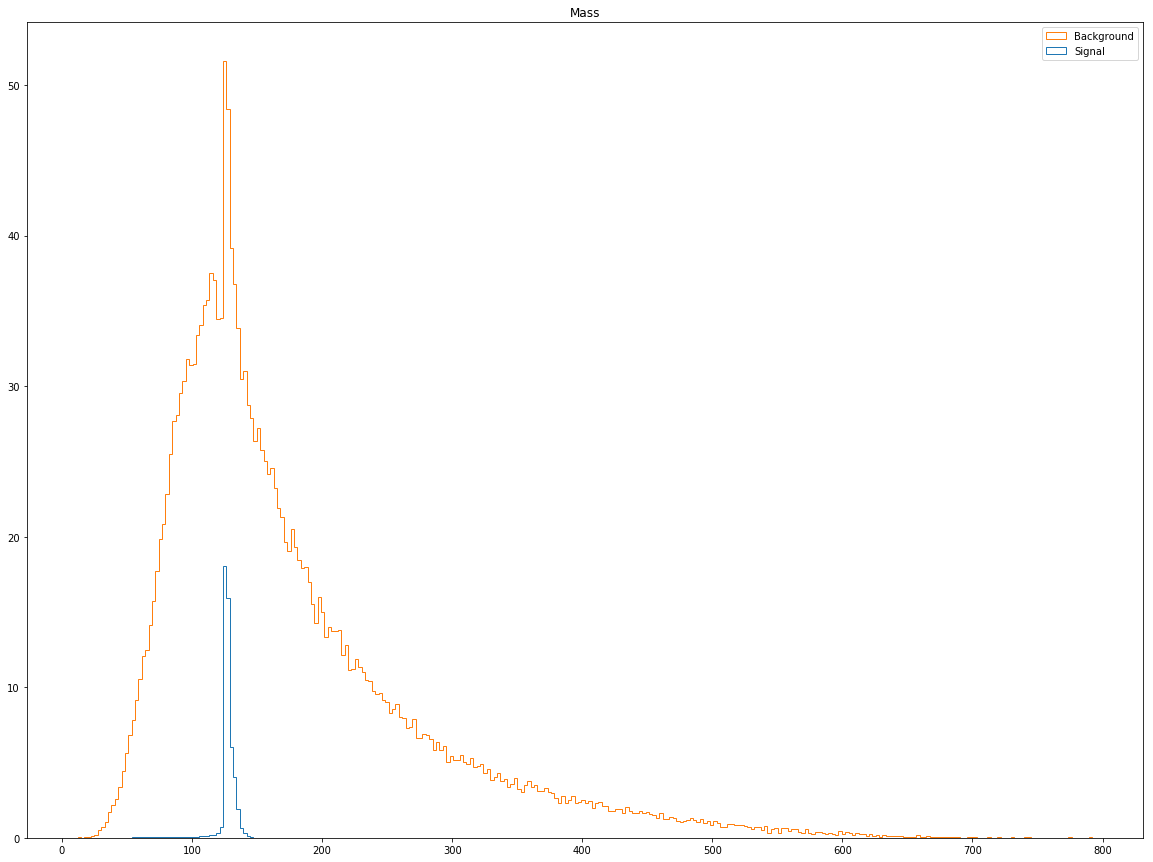

In [27]:
print(background.keys())
x= [signal['mass'], background['mass']]
dataweights = [[.0005]*len(signal['mass']), [.02]*len(background['mass'])]
plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("Signal","Background"))
plt.title("Mass")
plt.legend()
plt.show()

Evaluate expected significance without any event selection.

Use Poisson statistics for significance calculation

Compare the exact significance to the approximation  NHiggs/(√NQCD) . If they are equivalent, explain your findings.

In [58]:
p = (1-scipy.stats.poisson.cdf(2050, 2000))
print('sigma significance of {0:1.2f}'.format(stats.norm.ppf(1-p)))

print('{0:1.2f}'.format(50/np.sqrt(2000)))

sigma significance of 1.13
1.12


#### 2. Identify mass cuts to optimize the expected significance.
Try different mass cuts systematically

Evaluate expected significance for each set of mass cuts

Identify the set of mass cuts which give you the highest significance.

Text(0.5,1,'Mass')

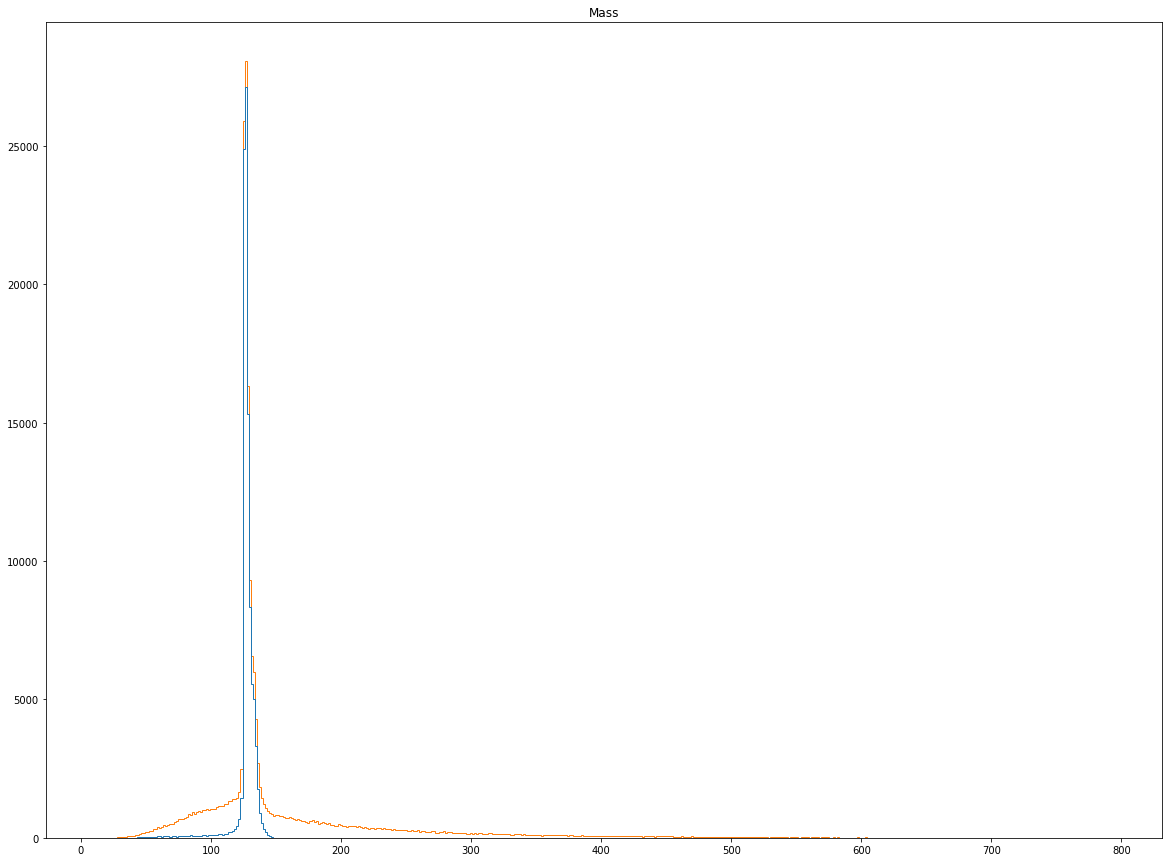

In [28]:
x= [signal['mass'], background['mass']]
plt.hist(x, 500, histtype="step", stacked=True, fill=False)
plt.title("Mass")

In [93]:
def slicer(lower, upper, key, signal, bkgd):
    bkgd_n = bkgd[key]
    signal_n = signal[key]
    bkgd_slice = bkgd_n[lower:upper:1]
    signal_slice = signal_n[lower:upper:1]
    
    bkgd_avg = 200000 * len(bkgd_slice)/len(bkgd_n)
    signal_avg = 5000 * len(signal_slice)/len(signal_n)
    
    p = (1-scipy.stats.poisson.cdf(bkgd_avg + signal_avg, bkgd_avg))
    print('Significance of {0:1.3f} for a cut from {1:1.1f} to {2:1.1f}'.format(stats.norm.ppf(1-p),lower,upper))

    return(signal_slice, bkgd_slice)

signal_slice, bkgd_slice = slicer(0, 9000, 'mass', signal, background)
signal_slice, bkgd_slice = slicer(0, 22000, 'mass', signal, background)

Significance of 3.345 for a cut from 0.0 to 9000.0
Significance of 5.226 for a cut from 0.0 to 22000.0


#### 3. Make two sets of stacked histogram plots for the rest of the features
Set A without any event selection

Can you identify another feature as discriminative as mass? (i.e. equal or better significance after feature cut)

Set B with your optimal mass cuts

Can you identify another feature to further improve your expected signifiance?

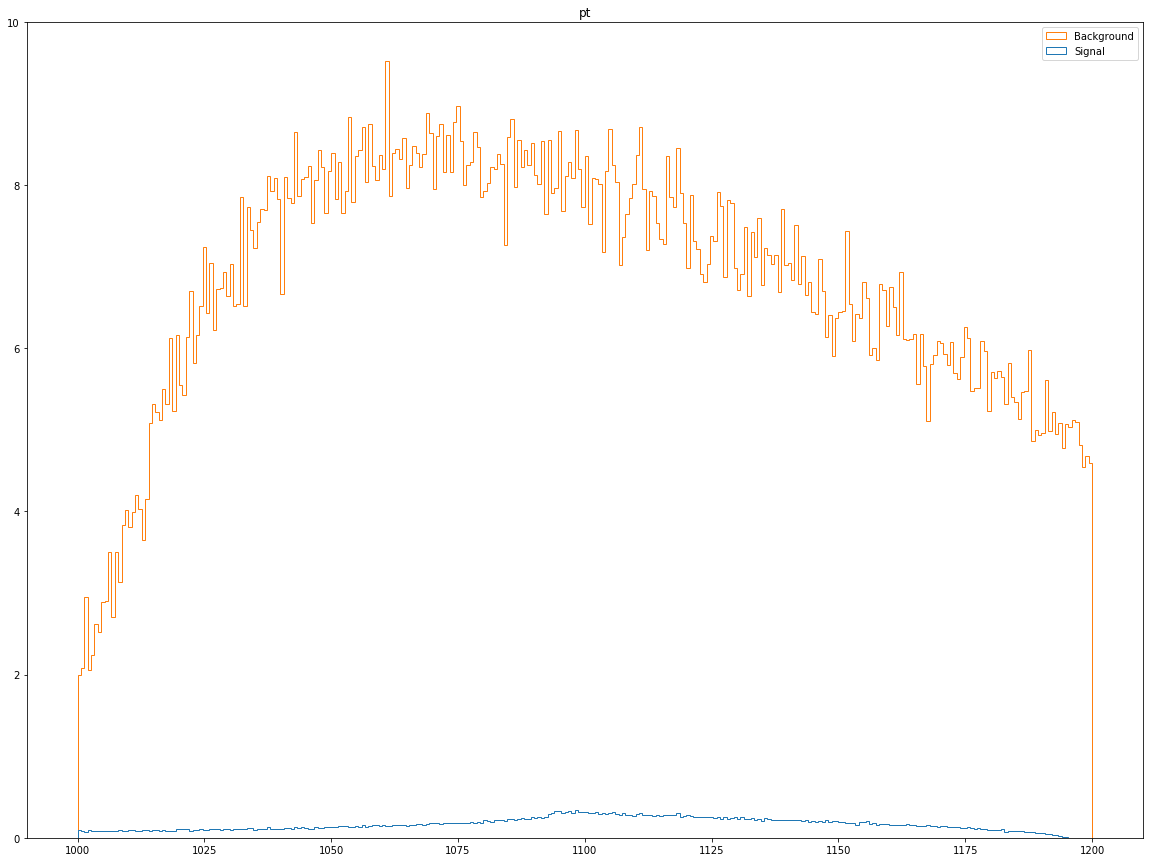

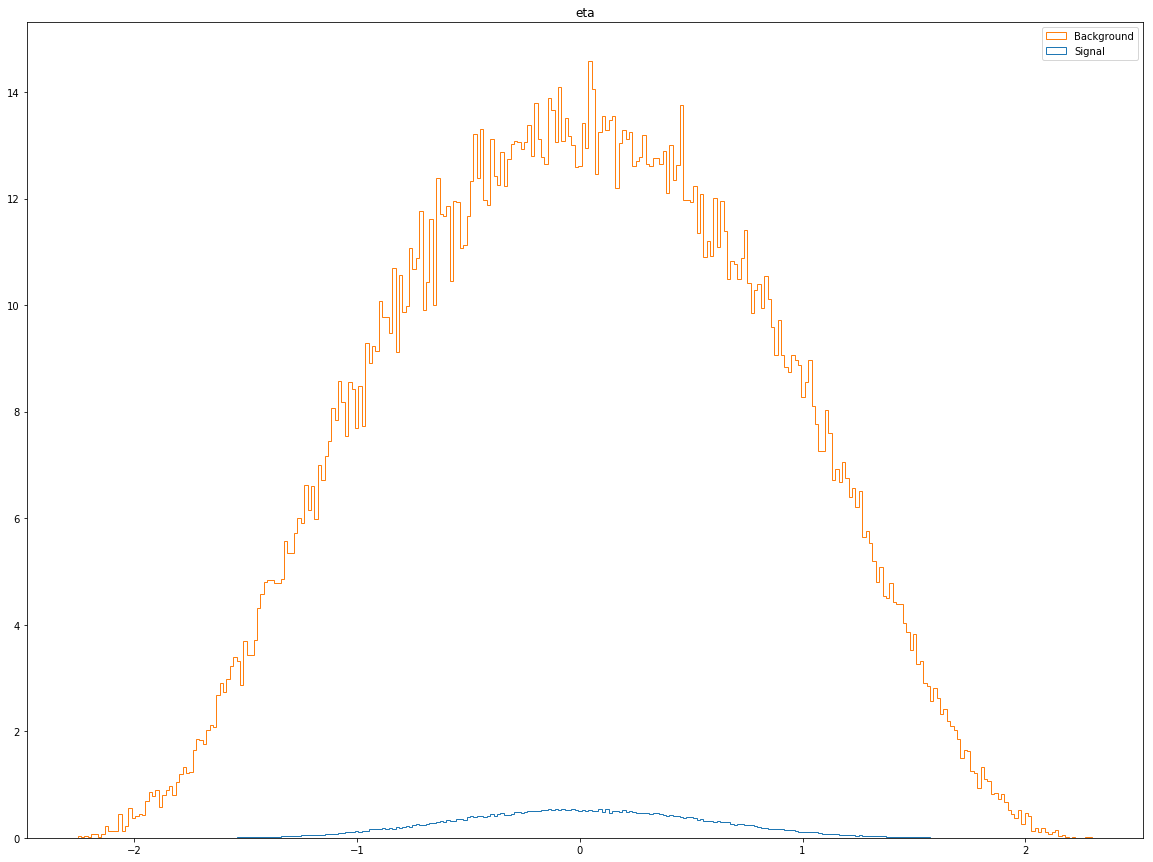

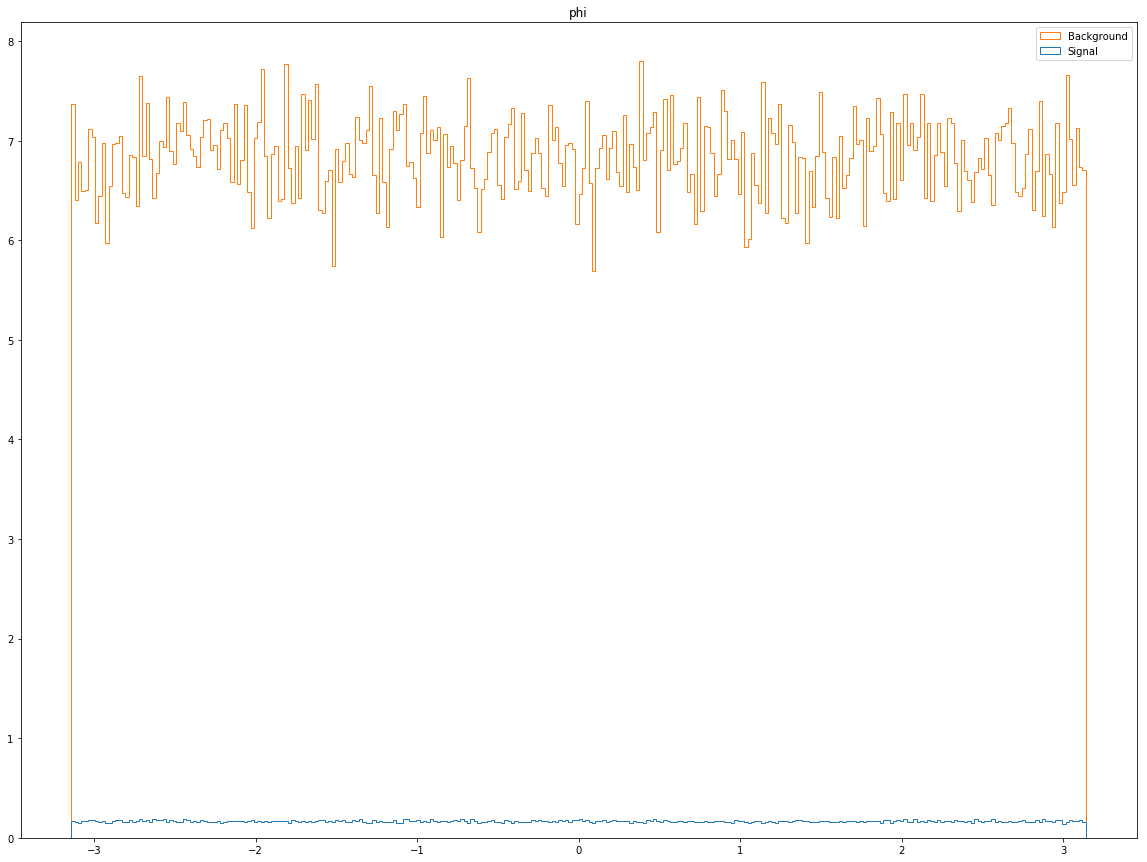

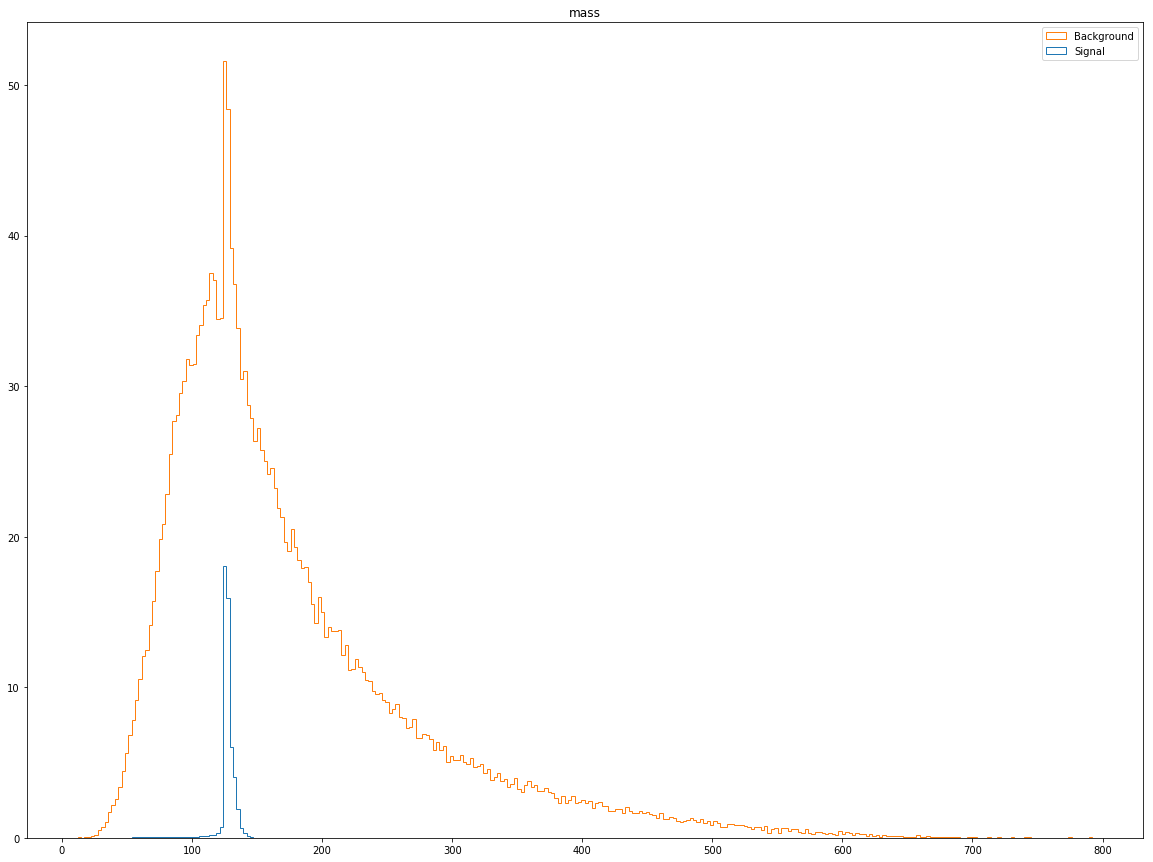

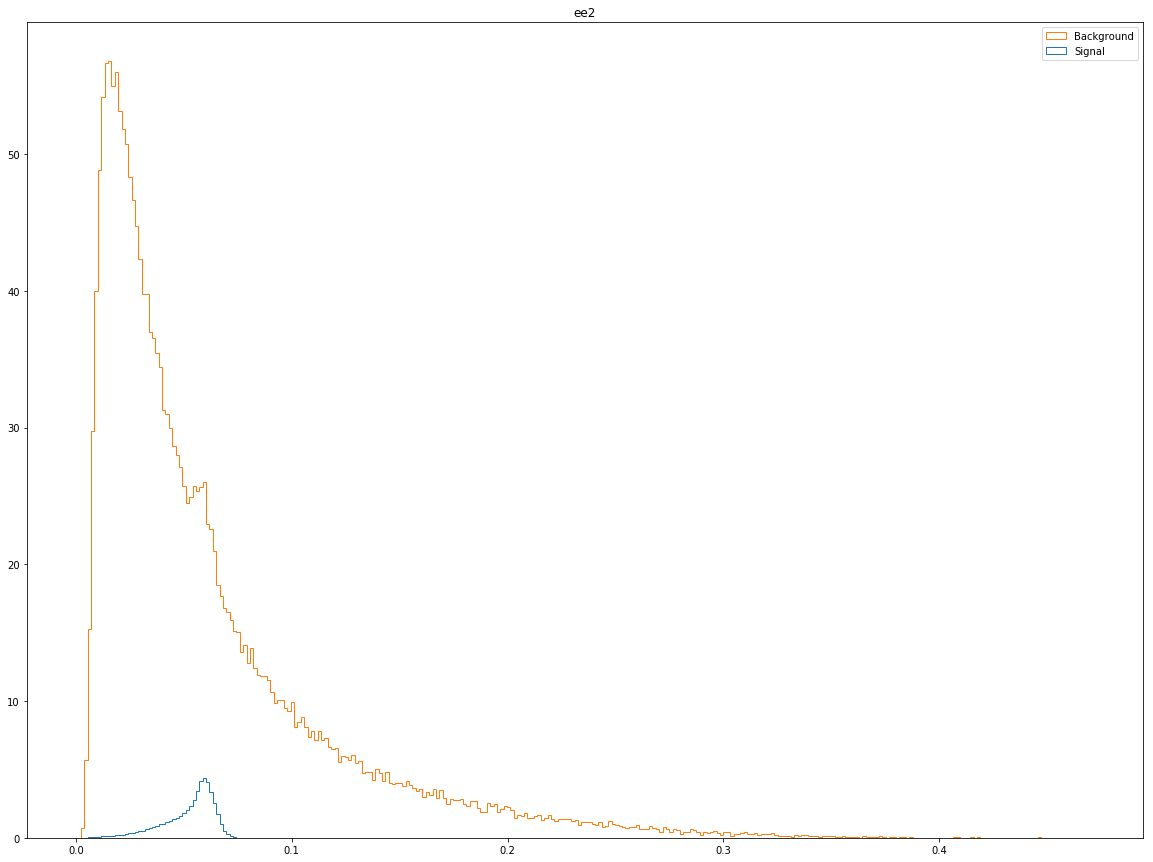

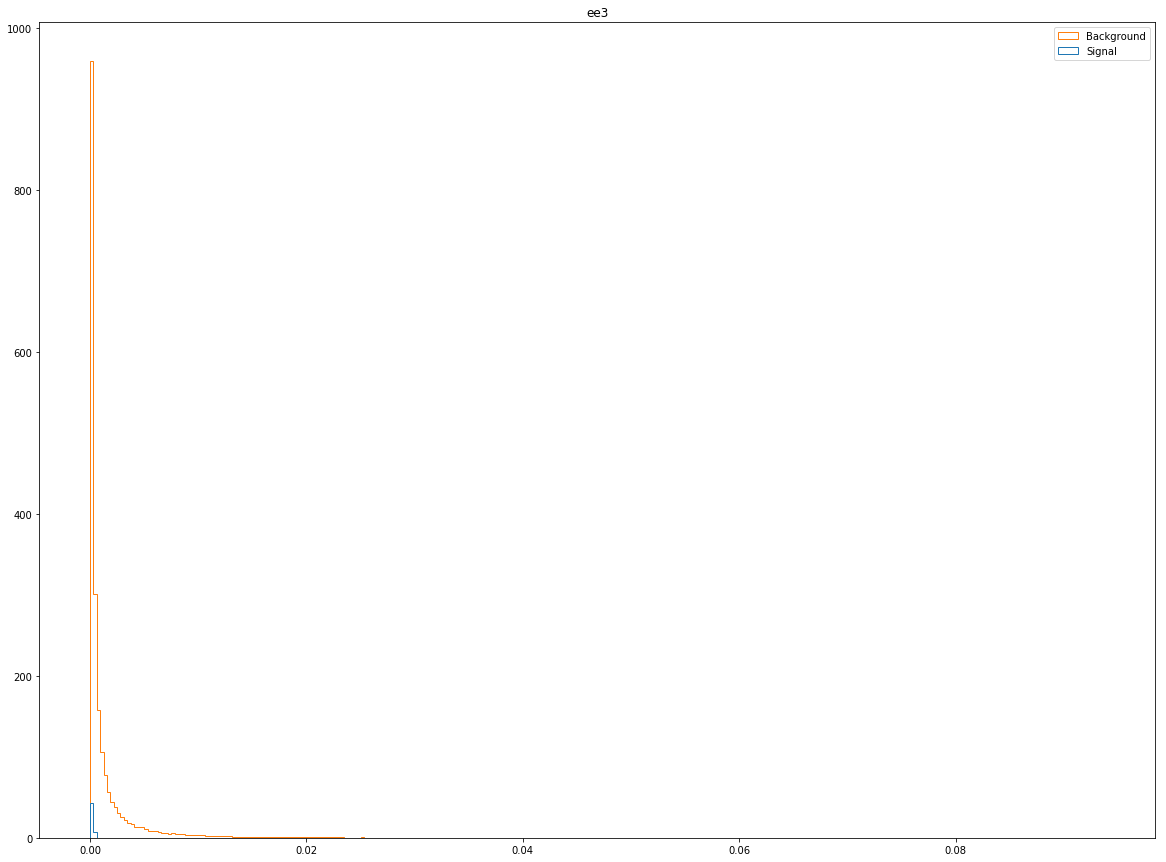

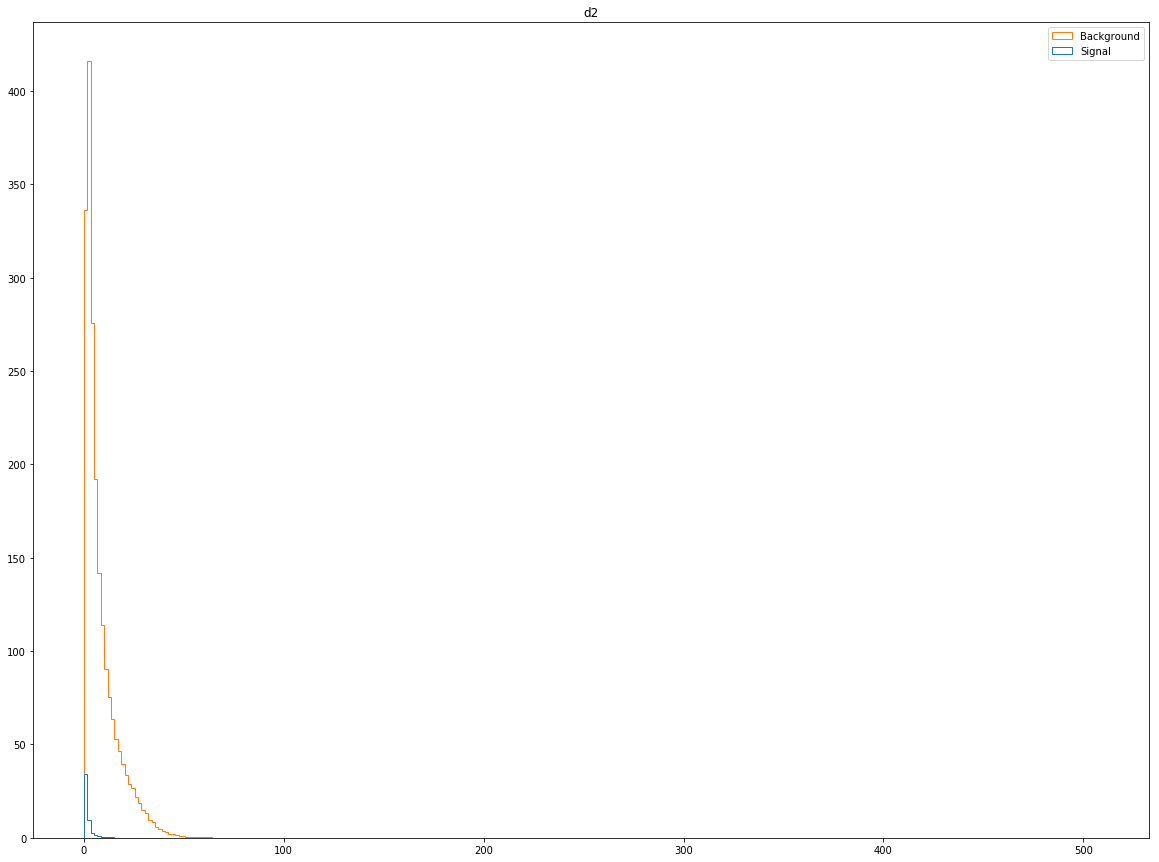

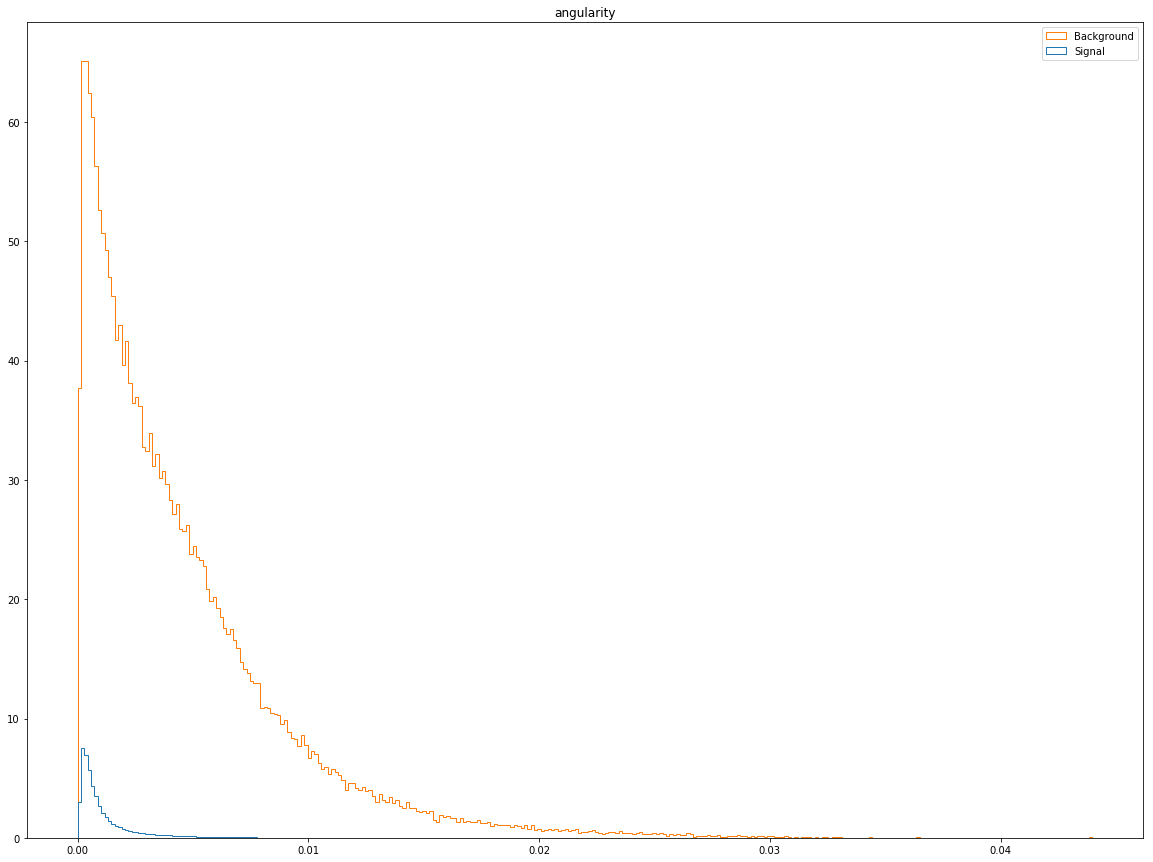

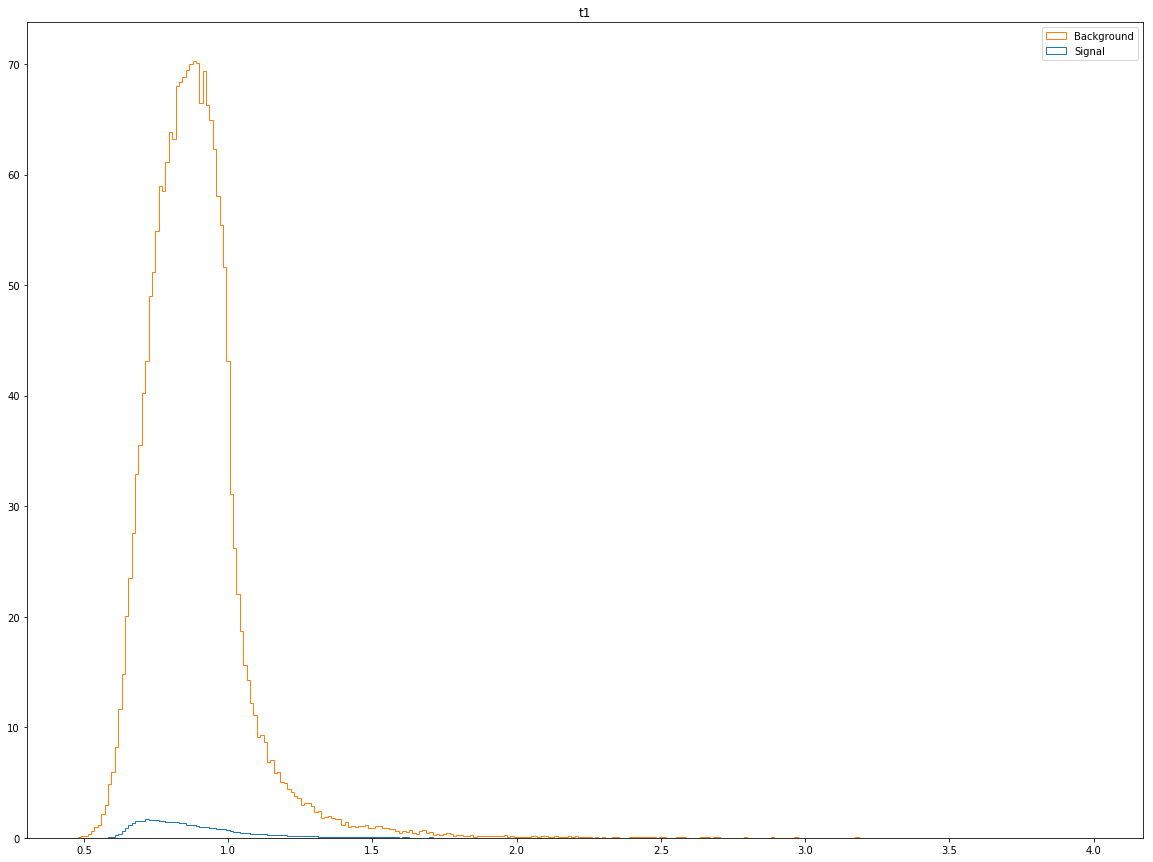

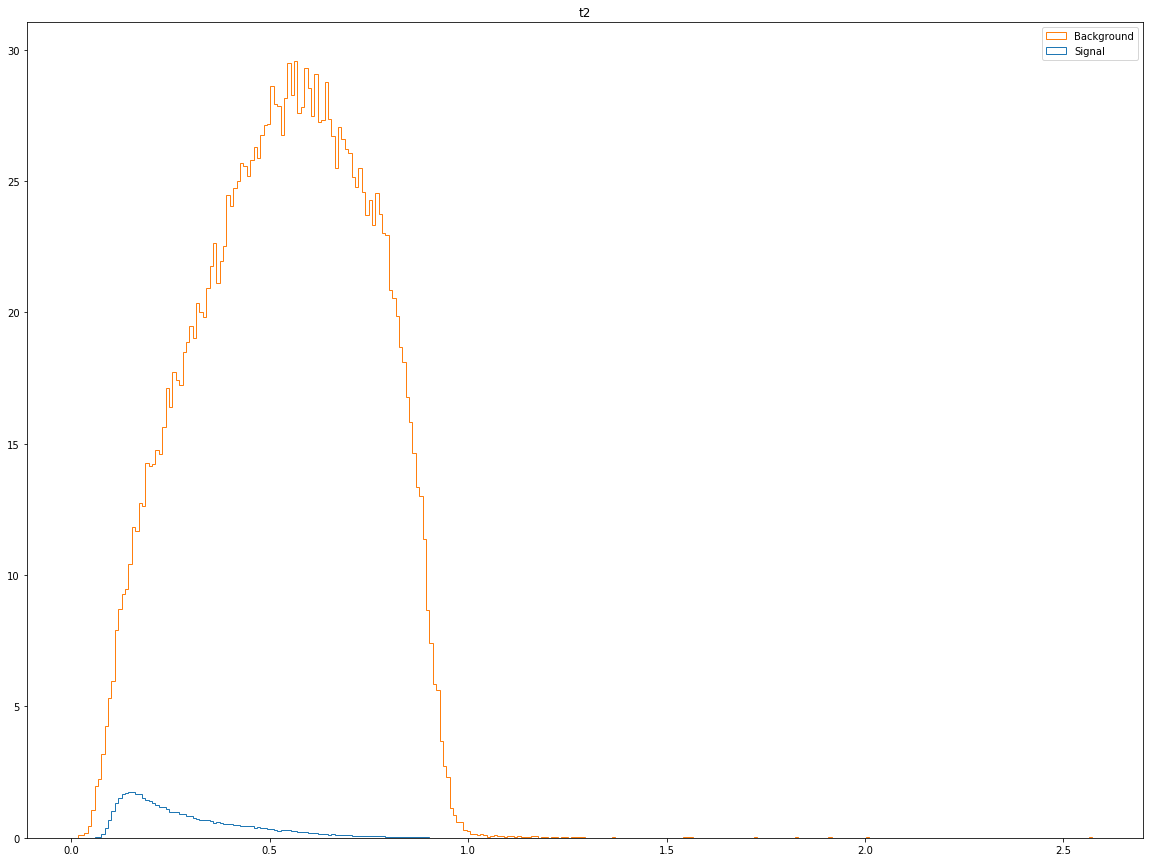

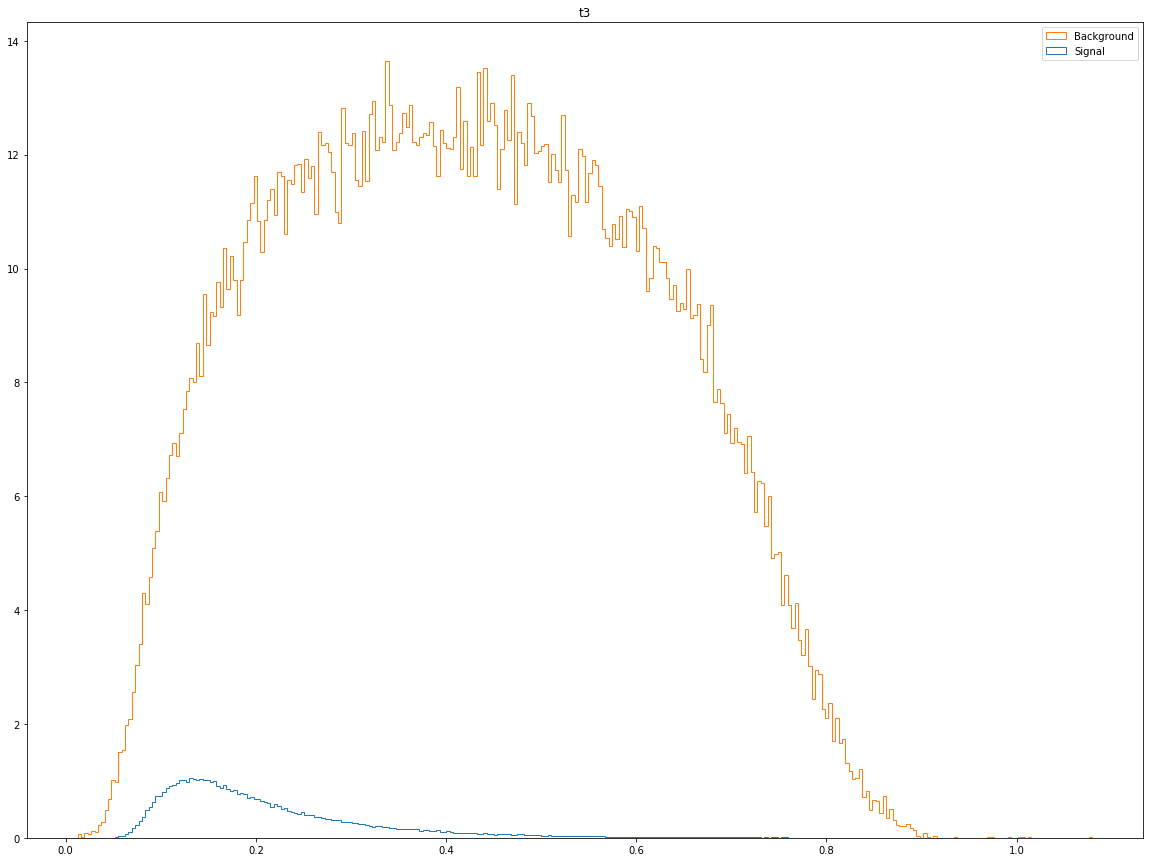

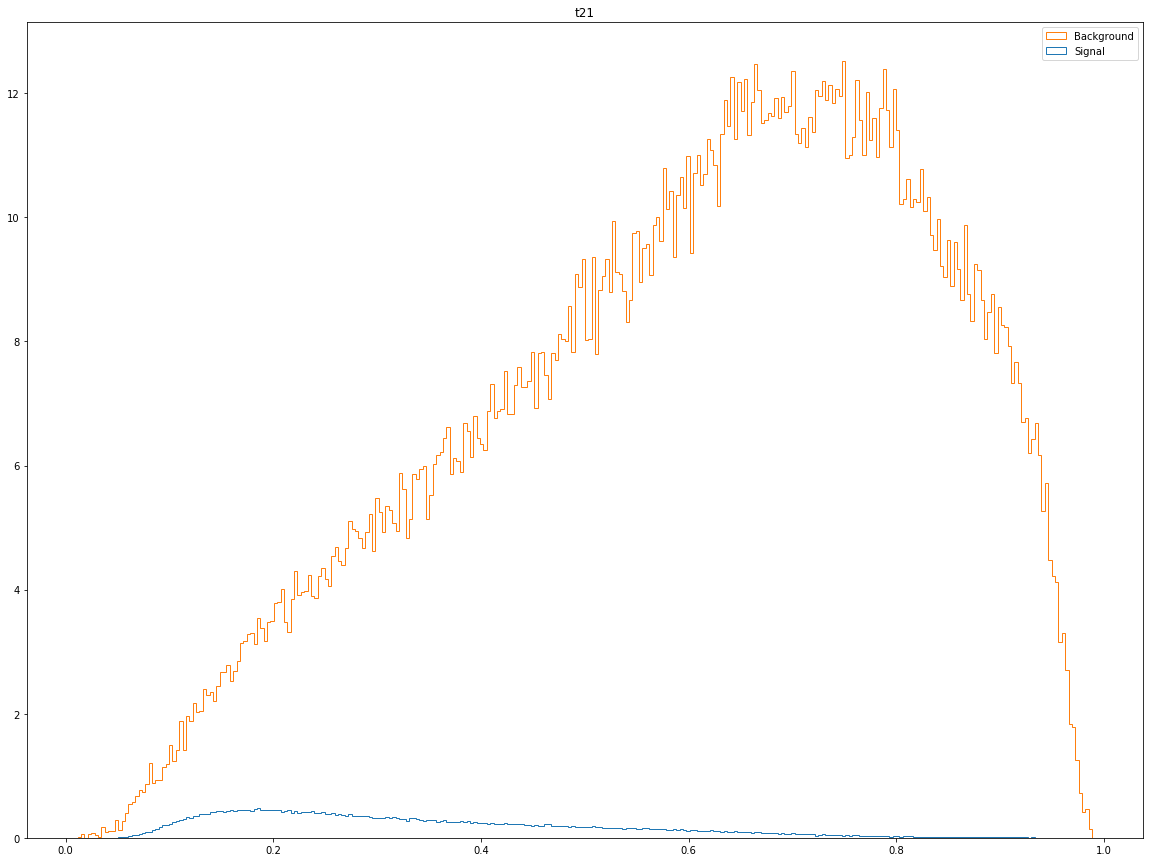

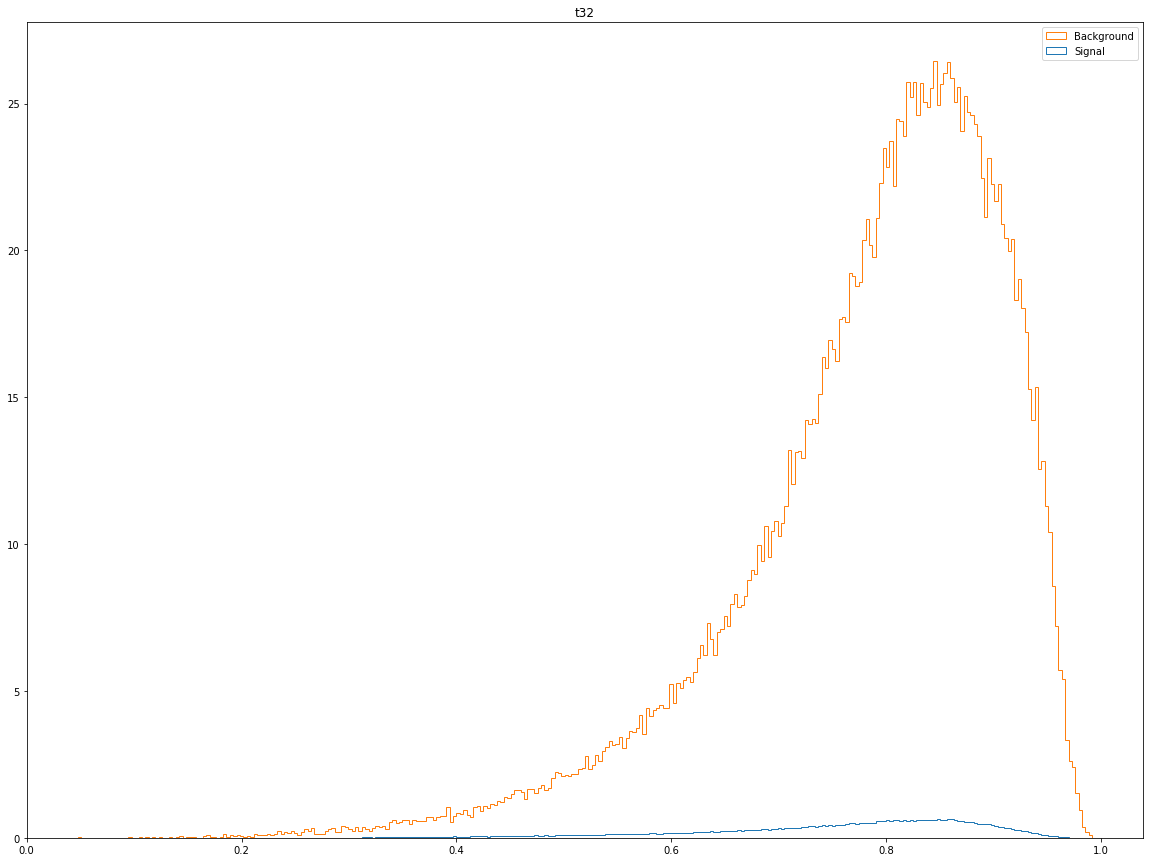

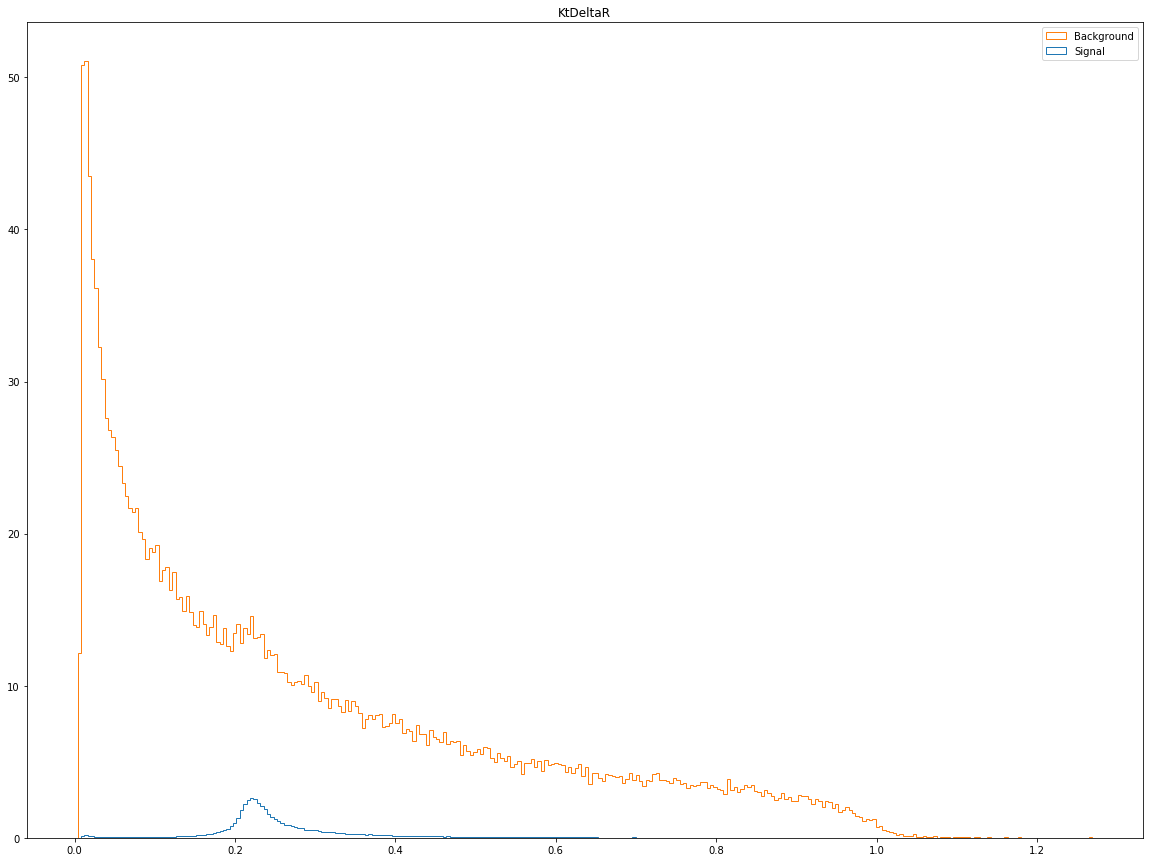

In [60]:
def plotWithoutCuts(key):
    x= [signal[key], background[key]]
    dataweights = [[.0005]*len(signal[key]), [.02]*len(background[key])]
    plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("Signal","Background"))
    plt.title(key)
    plt.legend()
    plt.show()

for key in background.keys():
    plotWithoutCuts(key)

Significance of 5.226 for a cut from 0.0 to 22000.0


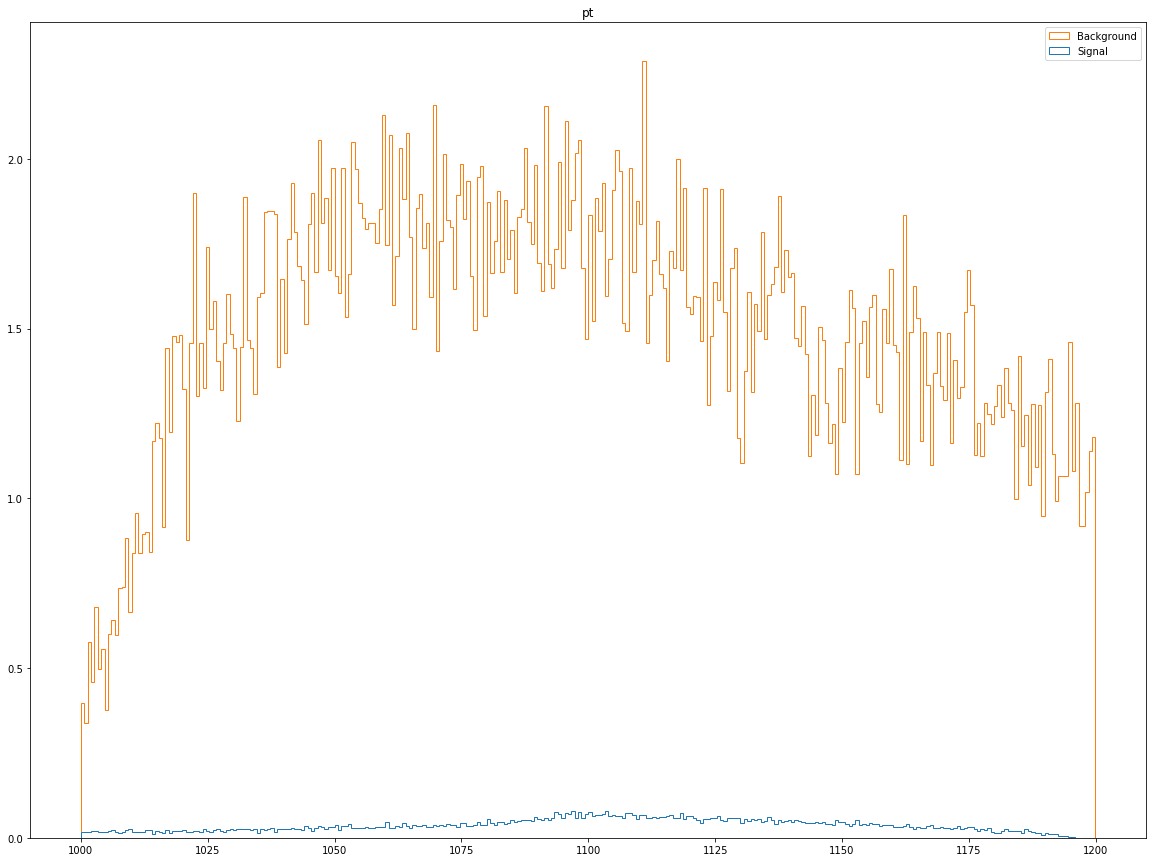

Significance of 5.226 for a cut from 0.0 to 22000.0


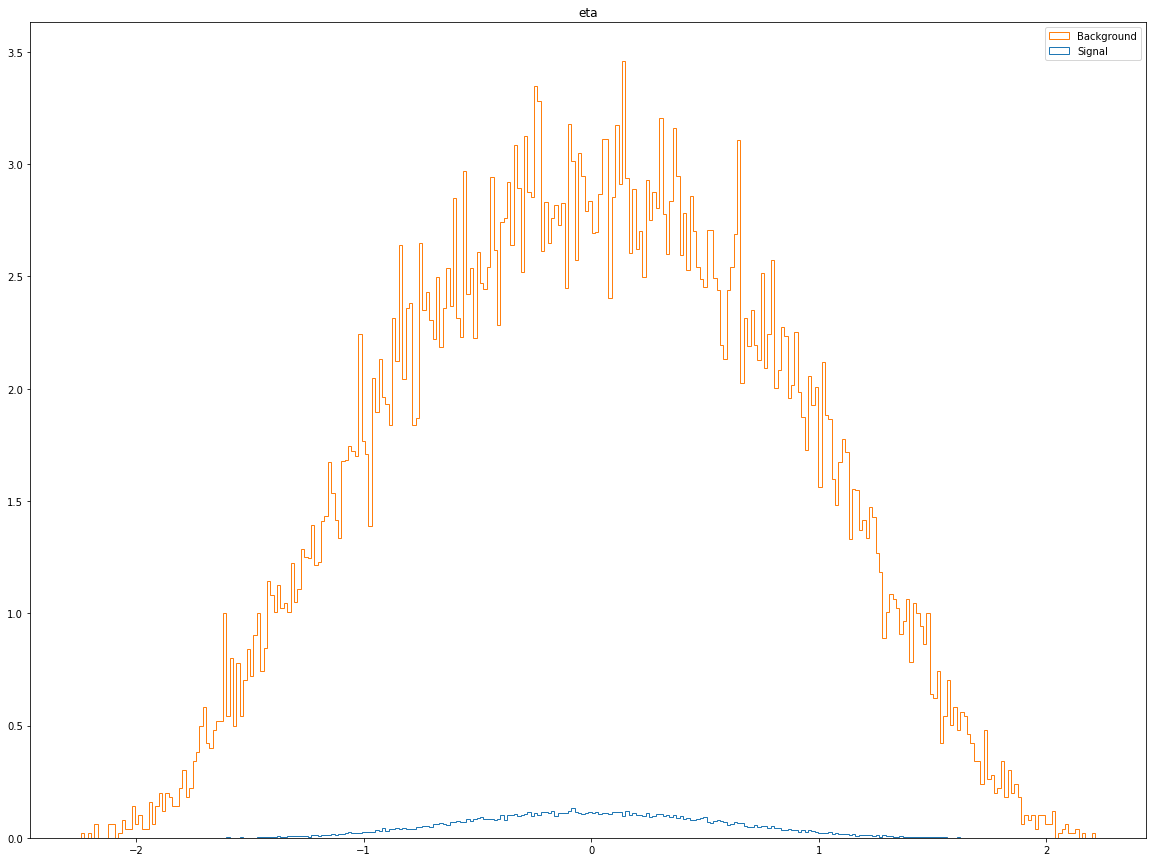

Significance of 5.226 for a cut from 0.0 to 22000.0


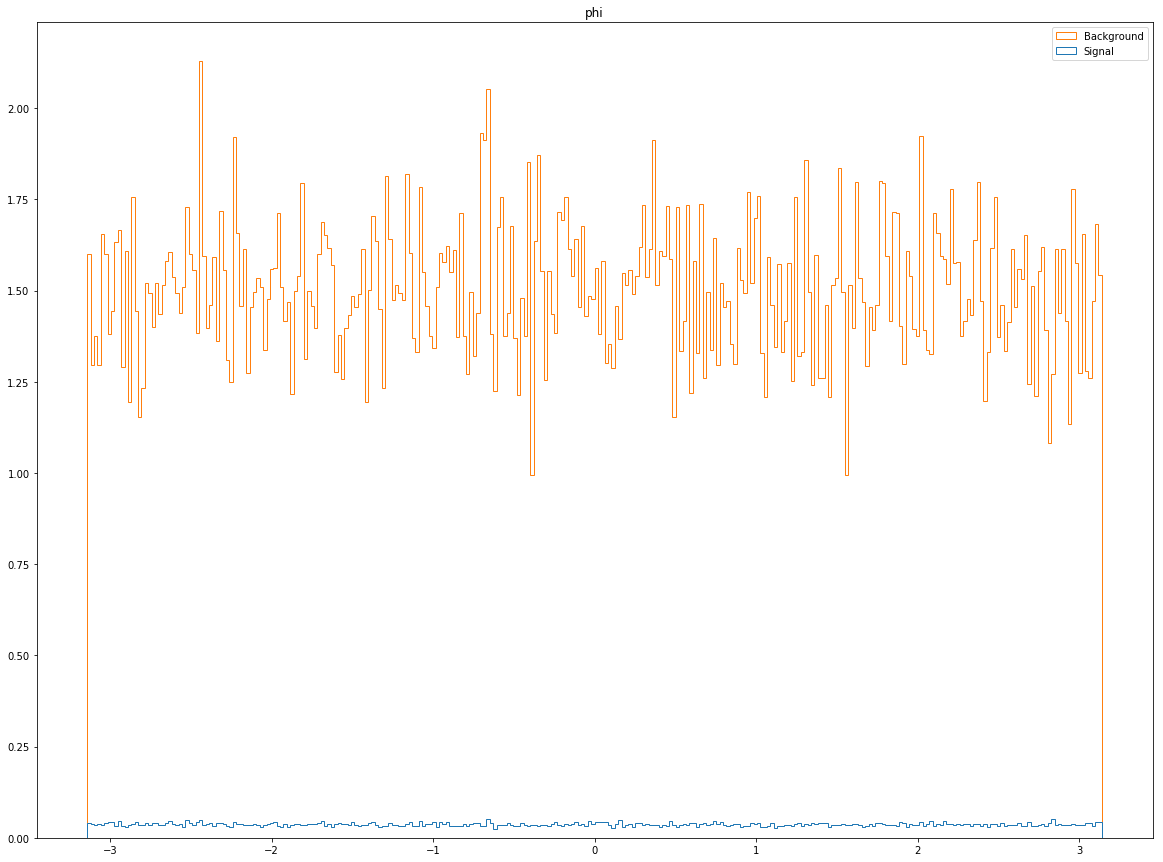

Significance of 5.226 for a cut from 0.0 to 22000.0


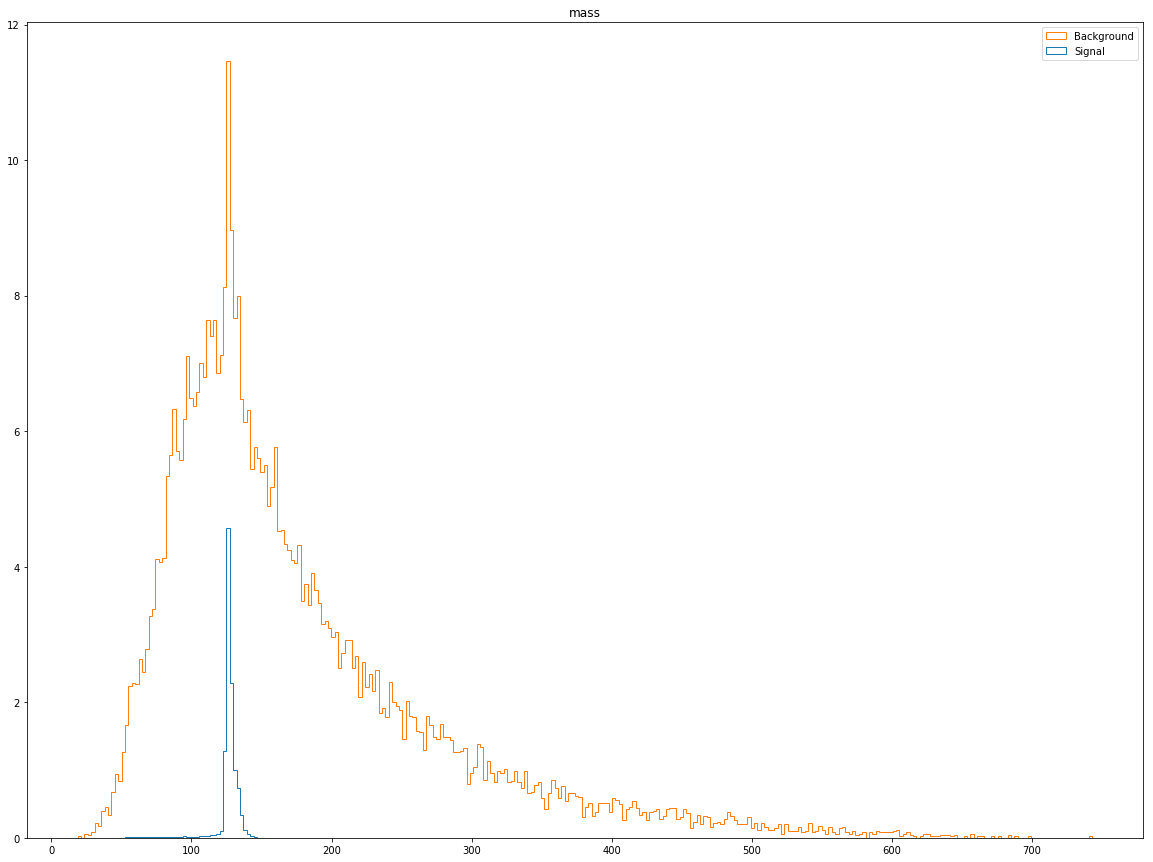

Significance of 5.226 for a cut from 0.0 to 22000.0


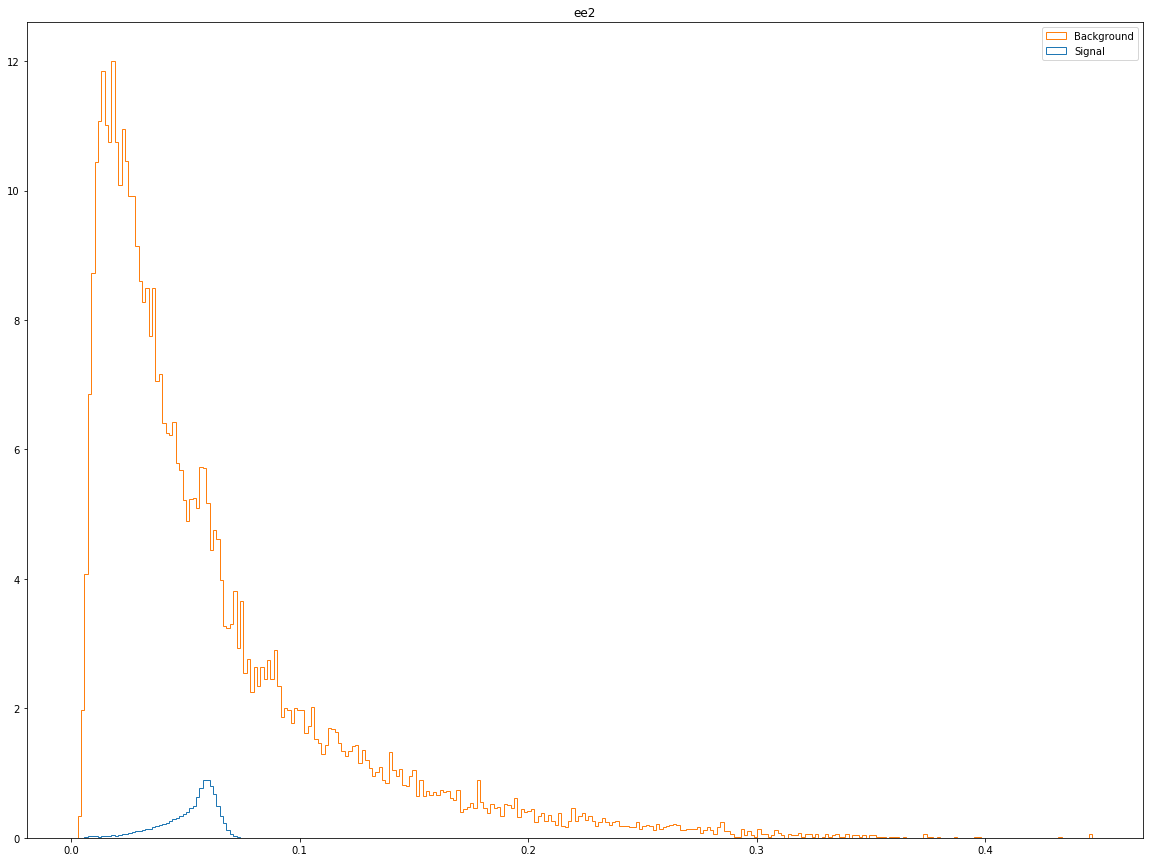

Significance of 5.226 for a cut from 0.0 to 22000.0


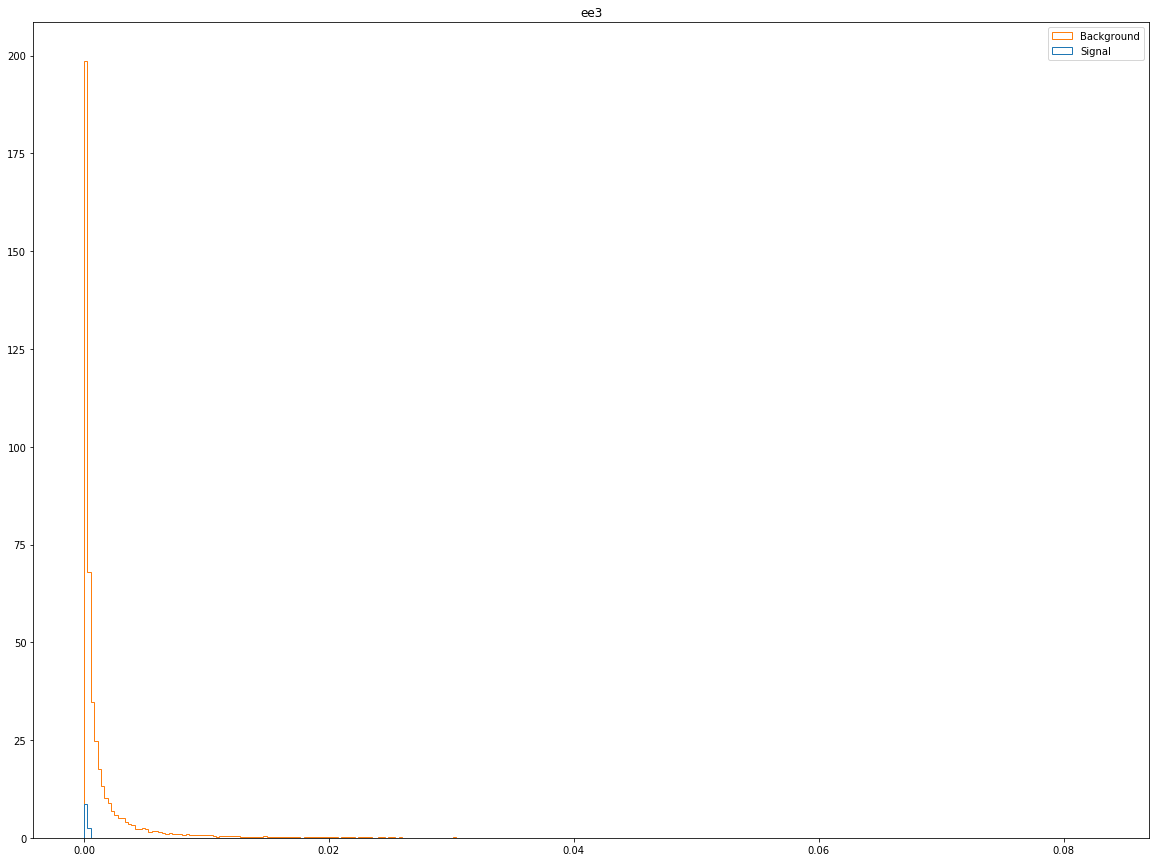

Significance of 5.226 for a cut from 0.0 to 22000.0


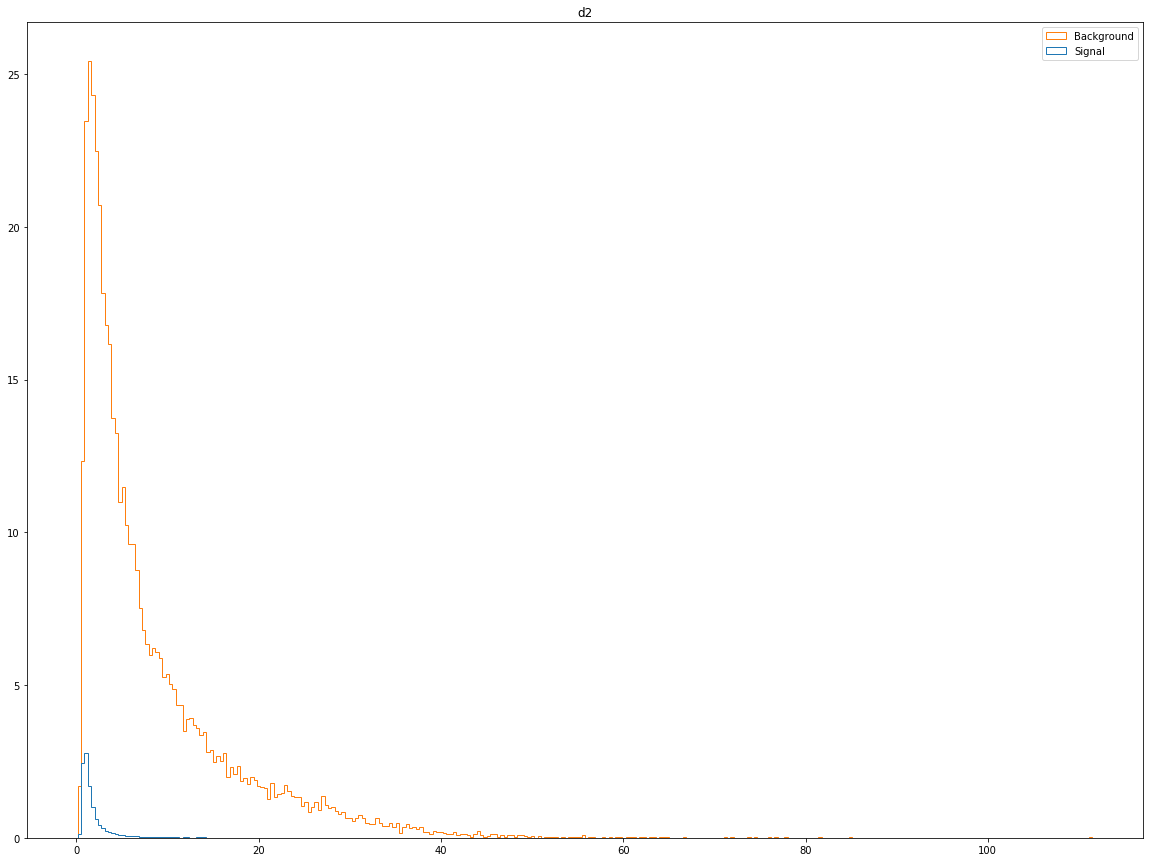

Significance of 5.226 for a cut from 0.0 to 22000.0


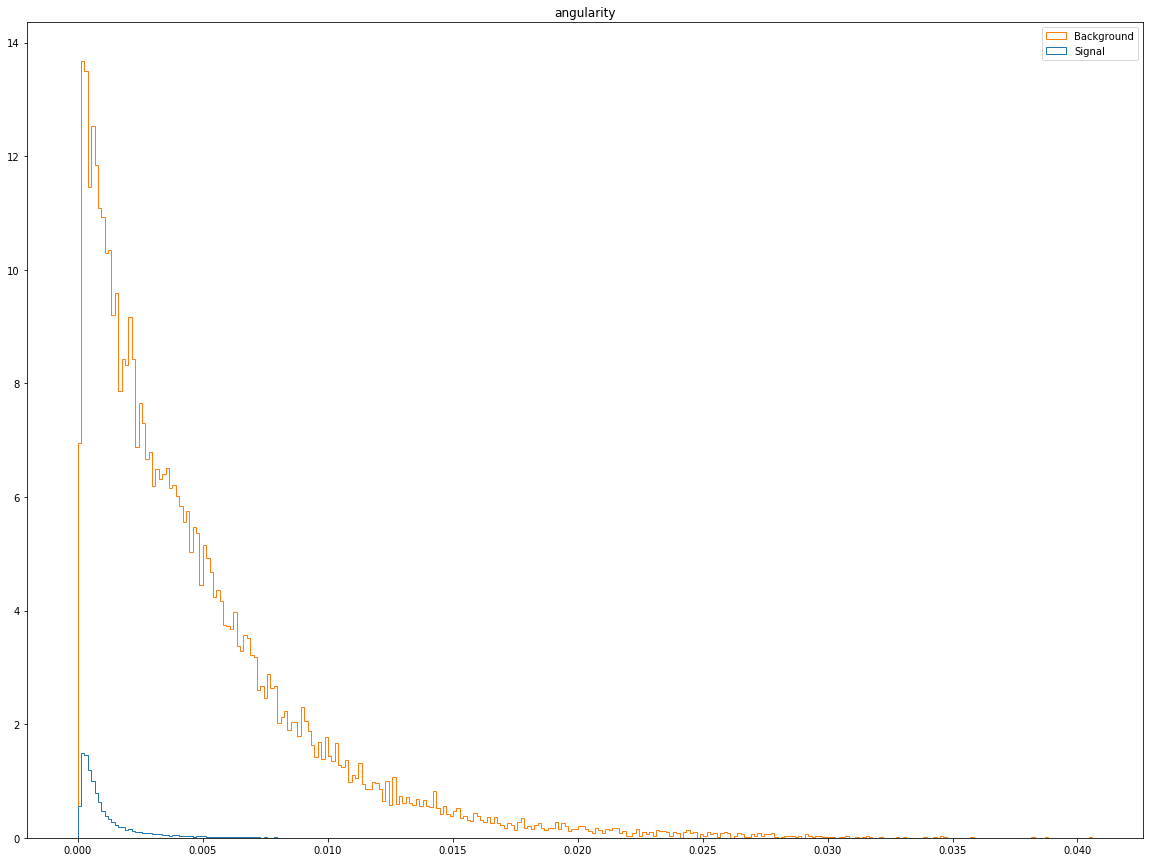

Significance of 5.226 for a cut from 0.0 to 22000.0


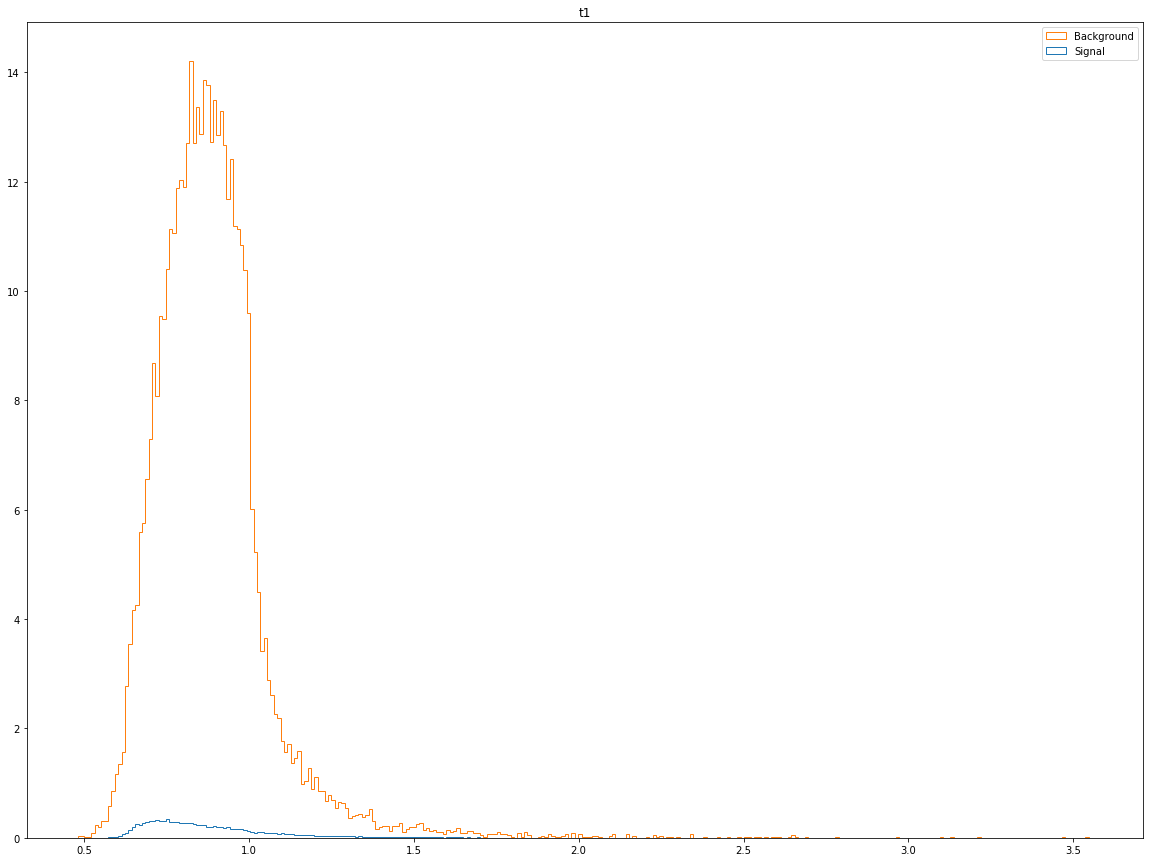

Significance of 5.226 for a cut from 0.0 to 22000.0


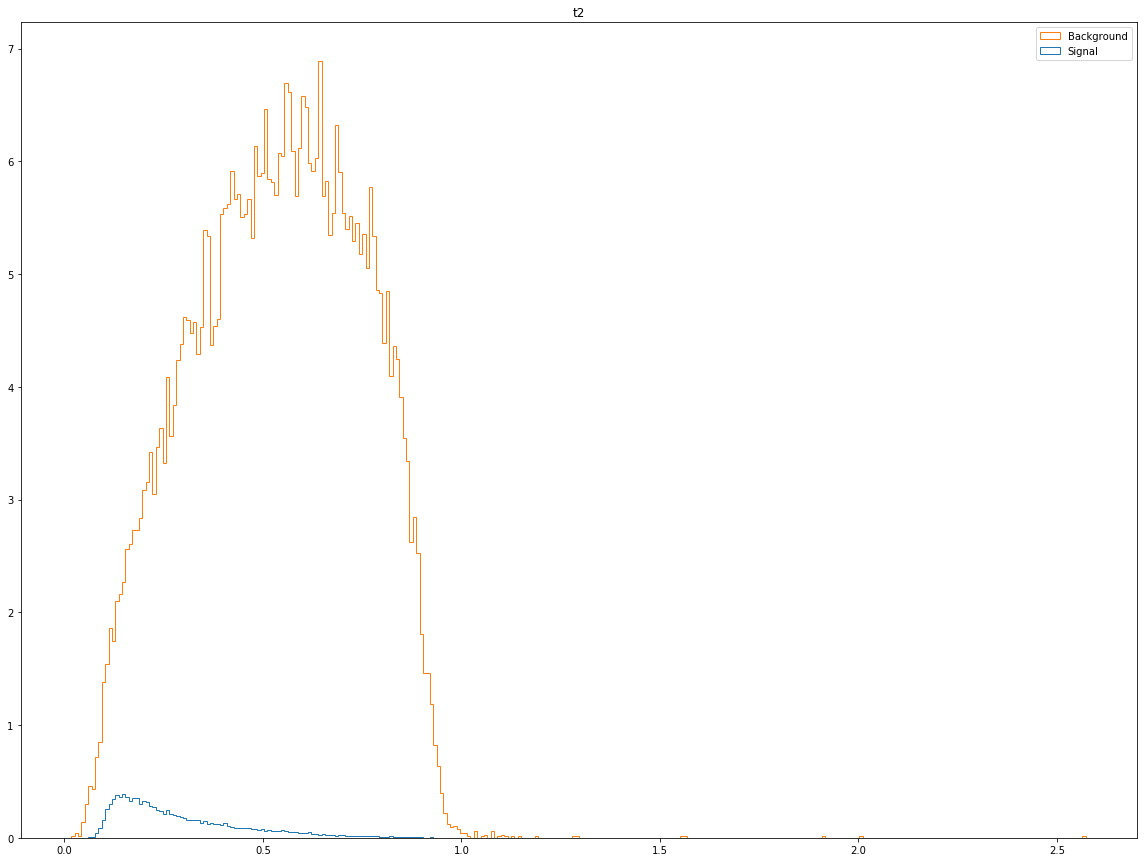

Significance of 5.226 for a cut from 0.0 to 22000.0


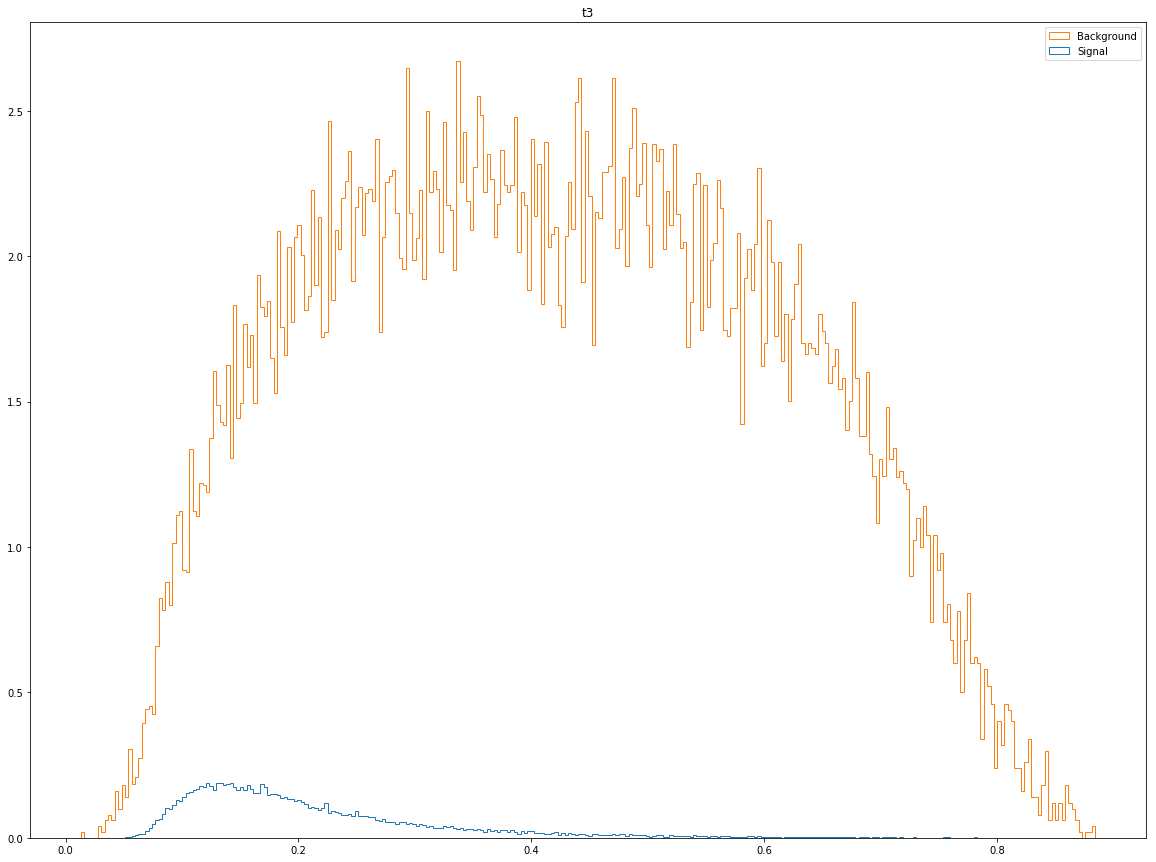

Significance of 5.226 for a cut from 0.0 to 22000.0


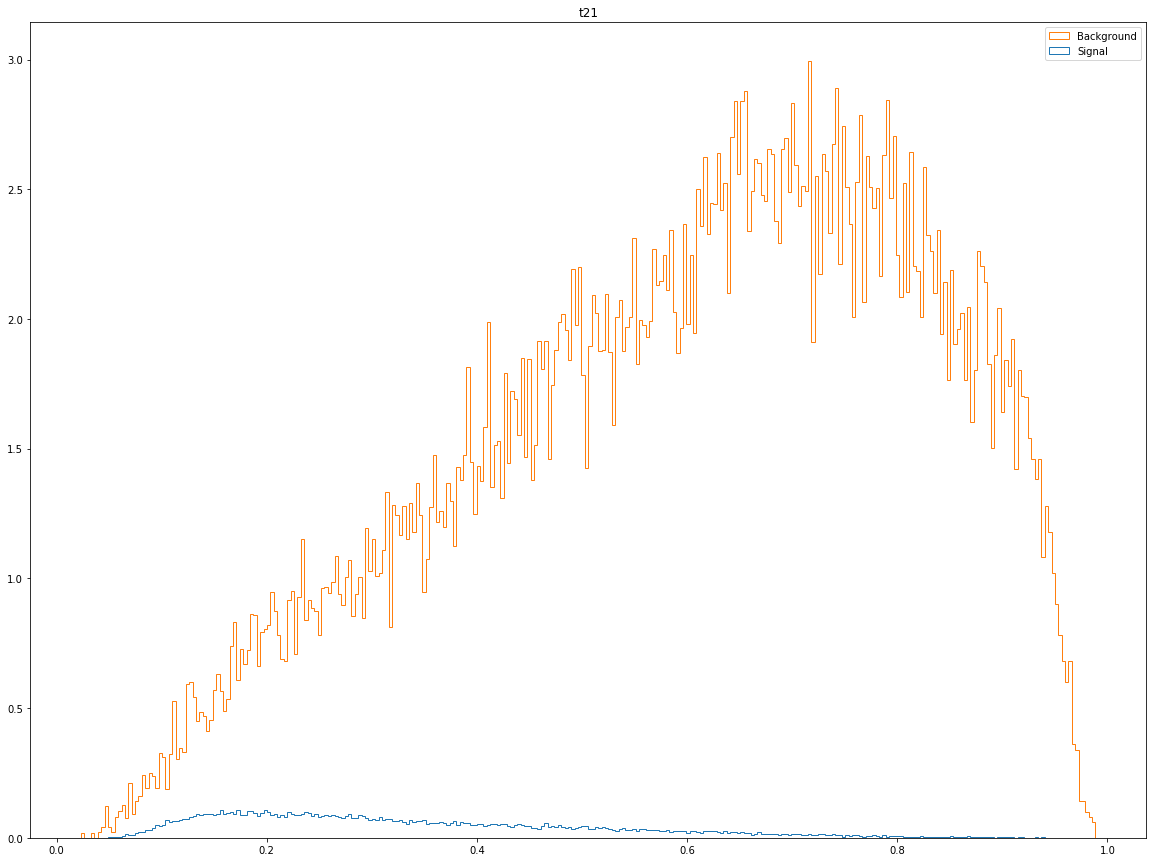

Significance of 5.226 for a cut from 0.0 to 22000.0


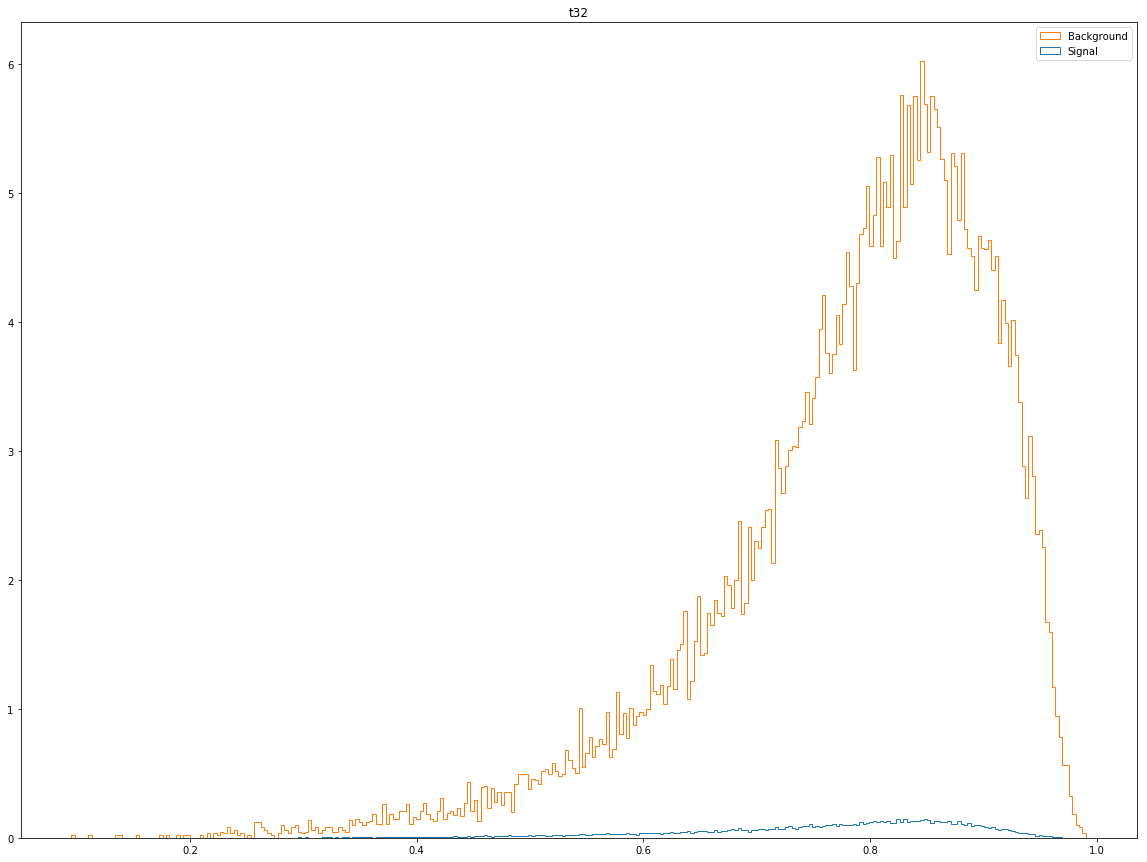

Significance of 5.226 for a cut from 0.0 to 22000.0


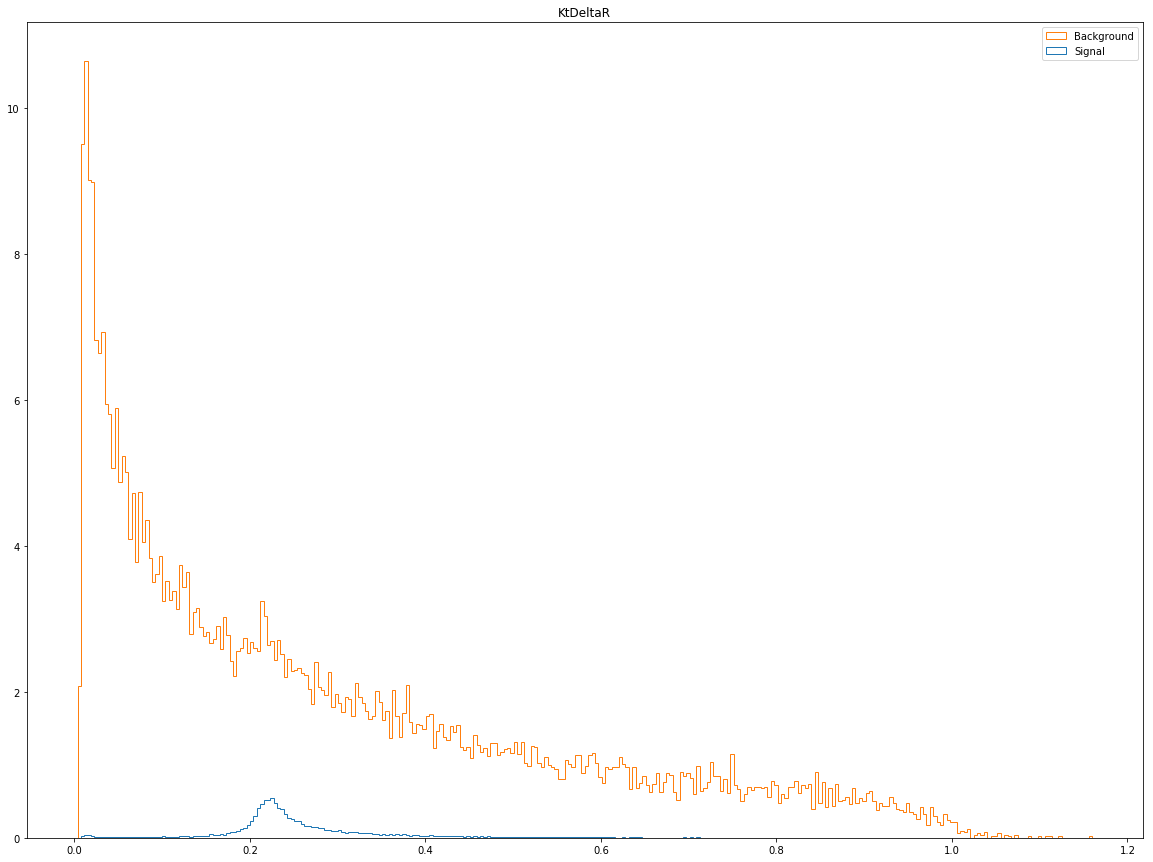

In [94]:
def plotWithCuts(key):
    signal_slice, background_slice = slicer(0, 22000, key, signal, background)
    x= [signal_slice, background_slice]
    dataweights = [[.0005]*len(signal_slice), [.02]*len(background_slice)]
    plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("Signal","Background"))
    plt.title(key)
    plt.legend()
    plt.show()

for key in background.keys():
    plotWithCuts(key)

#### 4. Optimize event selections using multiple features (if necessary)
Find a set of feature cuts which achieve high expected significance.

Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.

#### 5. Plot 2-dimensional plots using the top two most discriminative features
Can you find a curve or a linear combination in this 2D plane which gives even better sensitivity?